<a href="https://colab.research.google.com/github/dango80/Ames-House-Regression/blob/main/Home_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#First of all import the necessary libraries to continue the job
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Exercise 1:
This coding exercise should be performed in python or R. You are free to use the internet and any other libraries. Please save your work in a Jupyter notebook or share a colab page and email it to us for review.

Objective: Build a regressor that recommends the “crew” size for potential ship buyers.

Please do the following steps (hint: use numpy, scipy, pandas, sklearn and matplotlib)

Read the file and display columns.
Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations.
Select columns that will be probably important to predict “crew” size.
If you removed columns explain why you removed those.
Use one-hot encoding for categorical features.
Create training and testing sets.
Build a machine learning model to predict the ‘crew’ size.
Calculate the Pearson correlation coefficient for the training set and testing data sets.
Describe hyper-parameters in your model and how you would change them to improve the performance of the model.
What is regularization? What is the regularization parameter in your model?
Plot regularization parameter value vs Pearson correlation for the test and training sets, and see whether your model has bias problem or variance problem.

In [4]:
#I'm reading the dataset ... We have 158 rows and 9 columns
data=pd.read_csv("/content/drive/MyDrive/home_work.csv")
                 

In [5]:
#... and visualize it
data

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [6]:
#Let's see the first 10 rows
data.head(10)

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
5,Ecstasy,Carnival,22,70.367,20.52,8.55,10.20,34.29,9.20
6,Elation,Carnival,15,70.367,20.52,8.55,10.20,34.29,9.20
7,Fantasy,Carnival,23,70.367,20.56,8.55,10.22,34.23,9.20
8,Fascination,Carnival,19,70.367,20.52,8.55,10.20,34.29,9.20
9,Freedom,Carnival,6,110.239,37.00,9.51,14.87,29.79,11.50


In [7]:
#This are the columns of the dataset 
data.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [8]:
#Let's take a look to the type of collumns and non- null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


2)

In [9]:
#It seems there are no missing
data.isna().mean()

Ship_name            0.0
Cruise_line          0.0
Age                  0.0
Tonnage              0.0
passengers           0.0
length               0.0
cabins               0.0
passenger_density    0.0
crew                 0.0
dtype: float64

In [10]:
#Let's visualize the principal information about our quantitative variables
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,158.0,15.689873,7.615691,4.000,10.0000,14.000,20.0000,48.00
Tonnage,158.0,71.284671,37.229540,2.329,46.0130,71.899,90.7725,220.00
passengers,158.0,18.457405,9.677095,0.660,12.5350,19.500,24.8450,54.00
length,158.0,8.130633,1.793474,2.790,7.1000,8.555,9.5100,11.82
cabins,158.0,8.830000,4.471417,0.330,6.1325,9.570,10.8850,27.00
passenger_density,158.0,39.900949,8.639217,17.700,34.5700,39.085,44.1850,71.43
crew,158.0,7.794177,3.503487,0.590,5.4800,8.150,9.9900,21.00


In [11]:
#As we can see the magnitude and scale of the variables are different. We should probably scale it

In [12]:
#Some of them are skewed
data.skew()

Age                  1.234593
Tonnage              0.498268
passengers           0.409181
length              -0.785259
cabins               0.270291
passenger_density    0.940975
crew                 0.194787
dtype: float64

In [13]:
# Just a glance for the qualitative variable. 

In [14]:
#We can see that Ship_name has a maximum frequence of 4 so it's hard to regroup it( if we don't have further informations)
#We could try to do it for Cruise_line
data.Cruise_line.value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Cunard                3
Seabourn              3
Windstar              3
Oceania               3
Azamara               2
Disney                2
Crystal               2
Orient                1
Name: Cruise_line, dtype: int64

In [15]:
#the most frequent name is "Spirit" in 4 cases and the "Royal_Caribbean" is the most frequent Ship line. we have 138 and 20 different values for the 2 variables
data.describe(include= "object")

,Ship_name,Cruise_line
count,158,158
unique,138,20
top,Spirit,Royal_Caribbean
freq,4,23


3)

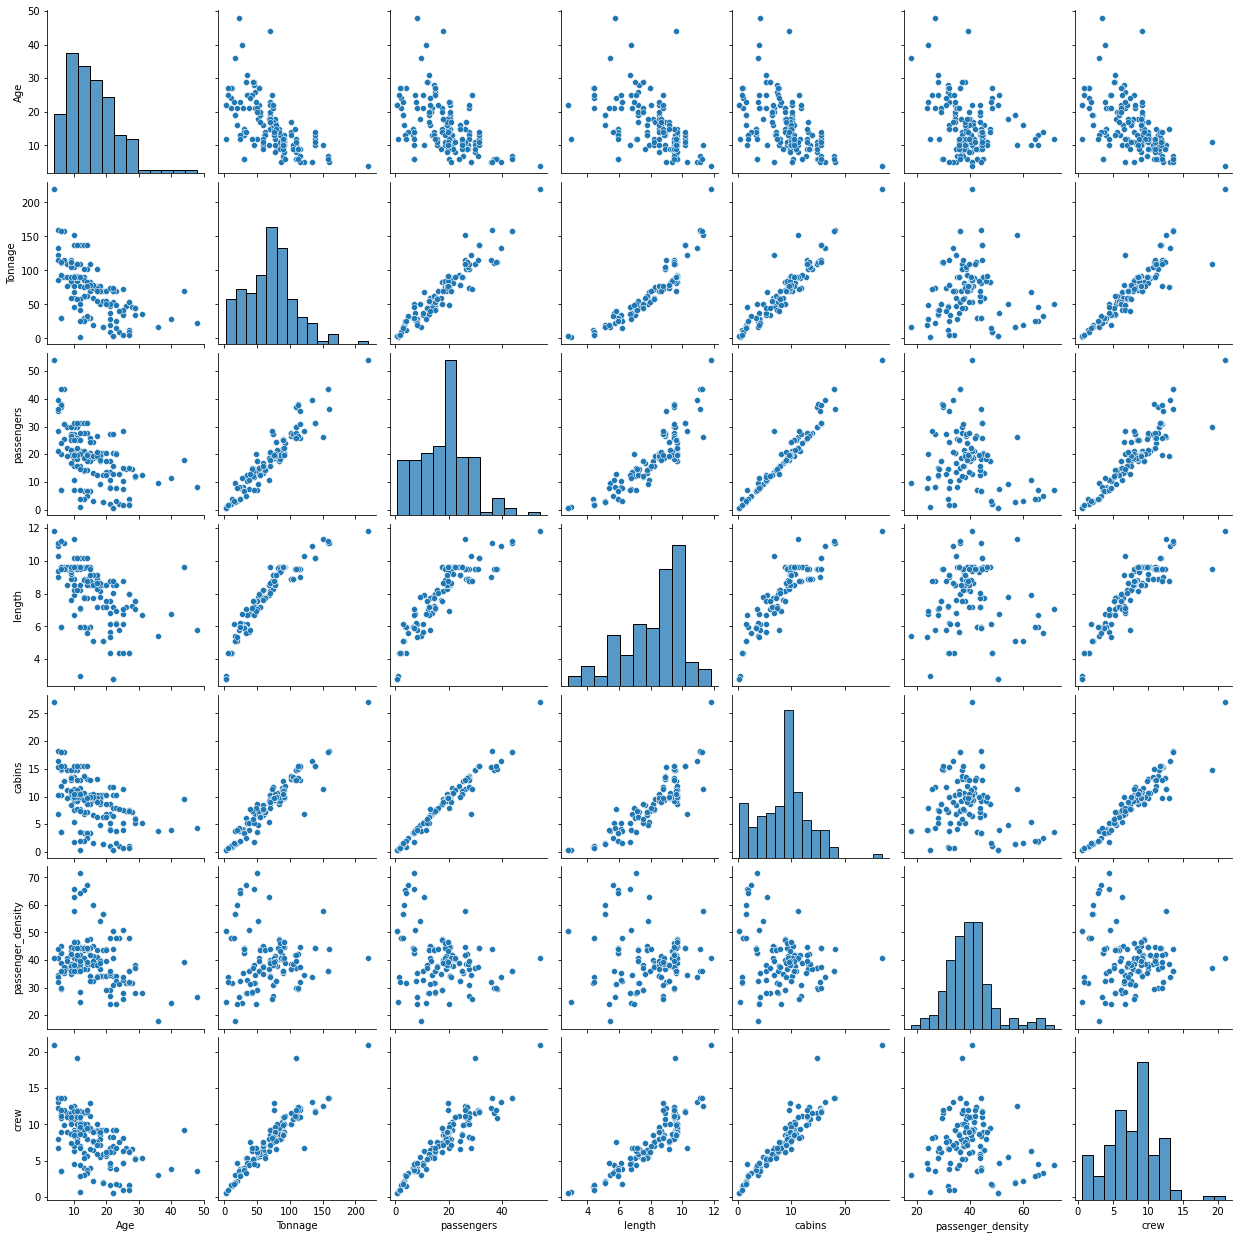

In [16]:
#We can have an idea of the correlation between variables with the pairplot of the distributions.
sns.pairplot(data)

The target variable is almost correlated with the other quantitative variable and we can observe a certain skewness on the distribution. We could think to normalize it. Many other predictors seems correlated bu themselves as well

In [17]:
#Almost everyone of the quantitative variables seems highly correlated with "Crew" except for passenger_density
data.corr()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.530657
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.927569
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.915234
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.895857
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.950823
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.155509
crew,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,1.000000


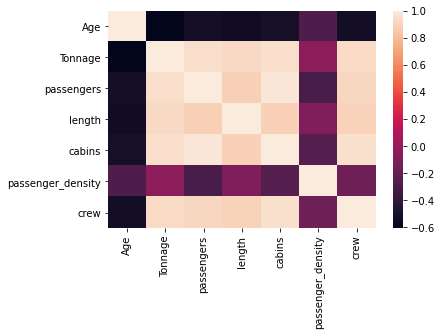

In [18]:
#we have to take a look to the correlation between the predictors
sns.heatmap(data.corr())

The most of the variables are highly correlated so we have to pay attention to the multicollinearity. However Passenger_density who seems less correlated to the target variable is incorrelated with the other potential predictors we could take it.

In [19]:
#We can observe different mean values for the different Cruise line it could be potentially interesting
data.groupby("Cruise_line")["crew"].mean().sort_values(ascending=False)

Cruise_line
Cunard               10.246667
Carnival             10.135909
Royal_Caribbean      10.016522
Disney                9.450000
Princess              9.322353
P&O                   8.588333
Norwegian             8.087692
Celebrity             8.072000
Costa                 7.700000
MSC                   7.540000
Holland_American      6.215000
Crystal               5.905000
Star                  5.363333
Oceania               4.000000
Azamara               3.550000
Orient                3.500000
Regent_Seven_Seas     3.146000
Silversea             2.472500
Seabourn              1.600000
Windstar              1.186667
Name: crew, dtype: float64

In [20]:
#We can see that Carnival, royal_Caribbean and Princess (who were the most frequents) has a high crew size and we have lowest values for the lines wiiesh a lowest frequency
data.groupby("Cruise_line")["crew"].count()

Cruise_line
Azamara               2
Carnival             22
Celebrity            10
Costa                11
Crystal               2
Cunard                3
Disney                2
Holland_American     14
MSC                   8
Norwegian            13
Oceania               3
Orient                1
P&O                   6
Princess             17
Regent_Seven_Seas     5
Royal_Caribbean      23
Seabourn              3
Silversea             4
Star                  6
Windstar              3
Name: crew, dtype: int64

we definitively could make some feature engineering on the variable Cruise_line and to keep it for the model

4)

I'd remove the *"Ship_name"* because it seems less significtive for the model and it's hard to transform in some useful way with feature engineering. i'll remove it and i prefer to keep Cruise_line who seems more sigificative. I will expect to find an outlier for the line "Cunard"

5)

Before to proceed with one hot encoding i want to make some feature engineering on the cruise_line variable because we have too much distint modalities and the less frequent has a similar behaviour on our target variable. We will join the modality with a frequency less than a certain threshold.

In [21]:
#Let's make a mapping to regroup the Cruise line based on the frequency
Line_mapping={'Azamara':'low', 'Carnival':'High', 'Celebrity':'Medium', 'Costa':'High', 'Crystal':'low', 'Cunard':'low',
       'Disney':'low', 'Holland_American':'High', 'MSC':'Medium','Norwegian':'High', 'Oceania':'low',
       'Orient':'low', 'P&O':'Medium', 'Princess':'High', 'Regent_Seven_Seas':'low',
       'Royal_Caribbean':'High', 'Seabourn':'low', 'Silversea':'low', 'Star':'Medium', 'Windstar':'low'}
data["Line_freq"]=data["Cruise_line"].map(Line_mapping)

In [22]:
# We have now a new variable that we can use for the One hot Encoding
data.Line_freq.value_counts()

High      100
Medium     30
low        28
Name: Line_freq, dtype: int64

In [23]:
#Now we  can create our dummy variable...
dummy=pd.get_dummies(data["Line_freq"])
dummy.head()

,High,Medium,low
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [24]:
#Now we can concatenate our dummy variables in the original dataset
data=pd.concat([data,dummy],axis=1)
data.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Line_freq,High,Medium,low
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,low,0,0,1
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,low,0,0,1
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70,High,1,0,0
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10,High,1,0,0
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00,High,1,0,0


6)

In [25]:
#Import the necessary library for the split
from sklearn.model_selection import train_test_split

Before to go on we should select the variables to create the X matrix for the predictors and the y columns for the target and transform it in array. To work with our data we need to scaled it and selecting the variables before

In [26]:
X=data[['Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'High', 'Medium','low']]

In [27]:
#As we use dummy variables i drop one that will be the baseline respect to the other
X = X.drop(['Medium'], axis=1)
X

,Age,Tonnage,passengers,length,cabins,passenger_density,High,low
0,6,30.277,6.94,5.94,3.55,42.64,0,1
1,6,30.277,6.94,5.94,3.55,42.64,0,1
2,26,47.262,14.86,7.22,7.43,31.80,1,0
3,11,110.000,29.74,9.53,14.88,36.99,1,0
4,17,101.353,26.42,8.92,13.21,38.36,1,0
...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0,0
154,14,76.800,19.60,8.79,9.67,39.18,0,0
155,25,5.350,1.58,4.40,0.74,33.86,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0,1


In [28]:
#It's time to scale data before to apply the model of linear regression
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler()
#Defining the X matrix of predictors
X=minmax_scale.fit_transform(X)
X

array([[0.04545455, 0.12839561, 0.11773528, ..., 0.46417272, 0.        ,
        1.        ],
       [0.04545455, 0.12839561, 0.11773528, ..., 0.46417272, 0.        ,
        1.        ],
       [0.5       , 0.20642621, 0.26621672, ..., 0.26242323, 1.        ,
        0.        ],
       ...,
       [0.47727273, 0.01387874, 0.01724784, ..., 0.30076307, 0.        ,
        1.        ],
       [0.52272727, 0.01387874, 0.01893513, ..., 0.26689001, 0.        ,
        1.        ],
       [0.43181818, 0.05704021, 0.04536933, ..., 0.56151126, 0.        ,
        1.        ]])

In [29]:
#Defining the target variable
y=data["crew"]
y

0       3.55
1       3.55
2       6.70
3      19.10
4      10.00
       ...  
153     0.59
154    12.00
155     0.88
156     0.88
157     1.80
Name: crew, Length: 158, dtype: float64

In [30]:
#Splitting the data in train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=1)

In [31]:
#Let's have a look to the dimensions of datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
y_test.shape

(110, 8)
(48, 8)
(110,)


(48,)

Now we have splitted the data

7)

In [32]:
#Instantiate and fit the model
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
cols=['Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'High','low']
n=0
for i in cols:
    print("The coefficient for {} is {}".format(i, regression_model.coef_[n]))
    n+=1

The coefficient for Age is -0.19036342677606433
The coefficient for Tonnage is 2.3175270574154947
The coefficient for passengers is -7.665688430907104
The coefficient for length is 3.742251798755576
The coefficient for cabins is 22.48701778603057
The coefficient for passenger_density is 0.10855739442325651
The coefficient for High is -0.647270211113942
The coefficient for low is -0.2989382729421073


We have to pay attention to evaluate the coefficient because there could be multicollinearity. Let's take a look to the results for the predictions

In [34]:
regression_model.coef_

array([-0.19036343,  2.31752706, -7.66568843,  3.7422518 , 22.48701779,
        0.10855739, -0.64727021, -0.29893827])

In [35]:
#Let's see the score of the model on training set
regression_model.score(X_train, y_train)

0.9234253490968567

In [36]:
#The same with the test set 
regression_model.score(X_test, y_test)

0.9523362154544126

Now we can compare the fist 10 predictions for the test set.

In [37]:
y_pred=regression_model.predict(X_test)
y_test.head(10)

29      9.99
107     6.96
14      9.30
81     10.00
124    13.60
19      9.20
73      7.60
11      6.60
40      3.85
95      7.94
Name: crew, dtype: float64

In [38]:
y_pred[0:10]

array([ 9.61374196,  7.1467438 ,  9.50626456,  9.33772228, 13.89358764,
        8.59012587,  7.72492445,  6.14437699,  3.61250291,  8.58035119])

IT seems we have a good result with an  𝑅2  of around  95  for the test set. The value for the test set is better than the training set so we can't say that there is overfitting with this model

8)

If you mean the Pearson's correlation coefficient who is the root of the coefficient of determination you have to make the square root of the  𝑟2  calculated on train and test set in terms of predictions for the target variable. In this case we are calculating the correlation between the y predicted respect to the real values. We have a better result so we can't say that there is overfitting. We could think about underfitting but 95% is a good result on our test set.

In [39]:
#This is the Coefficient of Pearson for 2 datasets ( if you want that)
np.corrcoef(X_train,X_test)

array([[ 1.        , -0.66727496, -0.67057604, ..., -0.79477933,
        -0.39822314,  0.00349893],
       [-0.66727496,  1.        ,  0.95938183, ...,  0.91353643,
         0.00875034,  0.03538531],
       [-0.67057604,  0.95938183,  1.        , ...,  0.97258462,
         0.01879032, -0.10068586],
       ...,
       [-0.79477933,  0.91353643,  0.97258462, ...,  1.        ,
         0.18260823, -0.09942887],
       [-0.39822314,  0.00875034,  0.01879032, ...,  0.18260823,
         1.        ,  0.59478032],
       [ 0.00349893,  0.03538531, -0.10068586, ..., -0.09942887,
         0.59478032,  1.        ]])

9)

Hyperparameter is a parameter that concerns the numerical optimization problem at hand. It is used to control the learning process.
While the simple Linear Regression that i used in this case doesn't present hyperparameter... i could use another valid model for a regression problem.. So i choose SVR

In [40]:
from sklearn.svm import SVR
regr=SVR(C=1.0,kernel="linear")
regr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In this case the kind of kernel is an hyperparameter. We have more options ("linear","poly","sigmoid"...) and the result will change. Let's see how the performances will change with different options for the Hyperparameter.

In [41]:
regr.score(X_train, y_train)

0.8864314479420111

In [42]:
regr.score(X_test, y_test)

0.9144408512515888

In [43]:
regr=SVR(C=1.0,kernel="rbf")
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.9087627899061025

In [44]:
regr=SVR(C=1.0,kernel="linear")
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.9144408512515888

In [45]:
regr=SVR(C=1.0,kernel="poly")
regr.fit(X_train, y_train)
regr.score(X_train, y_train)
regr.score(X_test, y_test)

0.9249547825946789

In this case the polynomial seems to be the best options.. We leave the default option (degree =3) for the polinomial degree

10)

We can consider the regularization as pthe process of adding information in order to prevent overfitting problems. We want now to introduce the Ridge Regression who is a more complex way to make linear Regression with the help of a term of regularization α (alpha) who introduce a penalty term. The regularization with the hyperparameter alpha modify the loss function avoiding overfitting. This especially when you have a lot of feature is important to drive the magnitude of some coefficients down and help in some way to keep an higher importance to the most important variables for the model.

In [46]:
from sklearn.linear_model import Ridge
regr_r = Ridge(alpha= 1.0)
regr_r.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
regr_r.score(X_test, y_test)

0.9195013562327117

In this case Alpha is the regularization parameter and if we change its value we will have a different score. In the case of SVR C was our parmeter of regularization

In [48]:
#With a lower value of alpha we improved our predictions like in this case
from sklearn.linear_model import Ridge
regr_r = Ridge(alpha= 0.5)
regr_r.fit(X_train, y_train)
regr_r.score(X_test, y_test)

0.9239872644477339

11)

We are going to plot the relation between the tuning of hyperparameter and the coefficient of correlation for training and test set. Let's start with the training

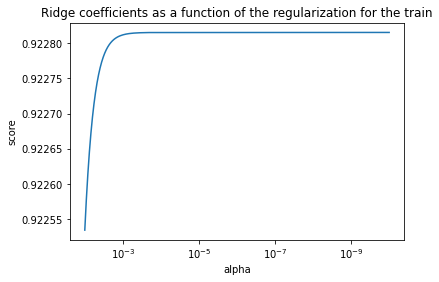

In [49]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
coefs_train=[]

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs_train.append(ridge.score(X_train,y_train))

    

ax = plt.gca()

ax.plot(alphas, coefs_train)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Ridge coefficients as a function of the regularization for the train')
plt.axis('tight')
plt.show()

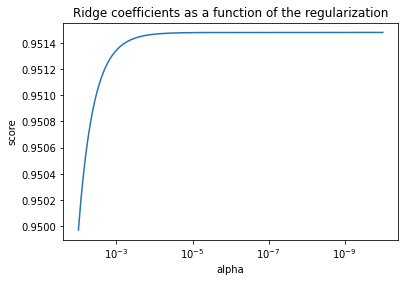

In [50]:
#And now the same with test set
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
coefs_test = []
coefs_train=[]

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs_train.append(ridge.score(X_train,y_train))
    coefs_test.append(ridge.score(X_test,y_test))
    
    

ax = plt.gca()

ax.plot(alphas, coefs_test)
#ax.plot(alphas, coefs_train)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

As we can see for lower values of alpha we have an improve in the pearson coefficient. We can note that both the training and the test set are almost good in predictions because the value of coefficient or  𝑟2  is over 90% and we can see that the score for test set is better than training. probably it depends on the way of splitting the dataset, we could change make some change or use the Cross-validation to prevent this but generally speaking our score is good s we can't speak of problem of bias. It would be different if it was something like 70%

Exercise 2
-----

1) There should be a specific database for users in which we have an indication about the timestamp ,mobile_os and app_versions for the users in a same way like for the Anomimous users so that we can extract information about the topic ( analize how quickly users update their mobile).

2) We need to consider in separate way users and anonymous visitors because not every visitor is registered and we want to make a separate analysis for the Users.

It's better to have different unique id for this 2 categories.

A same person can be anonimous and becoming a registered users after certain period.

3) I'm supposing to add the column "app_version" from the table bookings. In this way we have a count for the number of bookings for every kind of versions.

SELECT app_version, COUNT(*) as quantity FROM bookings GROUP BY app_version

We could add the WHERE clause specifying the old versions that we want.

4) The number of bookings is one of the best metric to choose for having a measure of the adoption but we should consider the ratio of conversions from the number of all the visitors (included the anonymous visitors) to have a better idea of the success of a certain app.

5) We should collect information about the number of visitors during time ( i'm using timestamp as indicator of time) and collecting the number of bookings to calculate the trend for the conversion rate.

The first query should be something like: WITH visits_time SELECT timestamp count(*) as n_visits FROM Visitors GROUP BY timestamp ORDER BY Timestamp

The second query should be: WITH bookings_time SELECT timestamp count(*) as n_bookings FROM Bookings GROUP BY timestamp ORDER BY Timestamp

After that i can convert this 2 query in dataframes and make a join and using a lineplot with timestamp in the x-axis and the ratio between n_visits and n_bookings in the y_axis


6) In this case i should use some tool to manage better the big data like Spark or using data partitioning. We can create a partitioned table based on the values of a specific column. We can creating additioning filegroup, than creating a partition function and a partition scheme.

Exercise 3
---

1) 
We have to consider the localization both of the country for the restaurant and for the visitors of the site and in the same time the general traffic for the restaurant. We have to take care of the number of views and the time that they spend reading the page from english speakers in this case. We have as well to consider the engagement in terms for example of like or registration to the site. Another aspect is how likely a customer is to recommend your product to other people.
We could use the A/B test before to launch it. 

2)
It could depends on many factors. We could have different kind of users of the product with different needs. We also have to consider the different nuances in the local cultures as well. For example people from scandinavian countries has a best knowledge of english language respect to other nationalities and they couldn't feel the need of a translation. 
To have a success sometimes you could need to change some details on the way to promote the service or the design or the way of payment for example could change for every potential audiance based on the localization.

3)
We could use the ROI (return of investment) to evaluate how efficiency or the profitability of this action. We could calcolate the percentage of conversions. If you use email campaigns you could use the click through rate.
I will expect different results for this 3 cases but everyone could be useful for a specific goal.
a)If we use the most performing pages we will expect to have a good result because we will have more chance to obtain views but in the same time the cost should be higher.
b)In this case we should optimize better in terms of conversions because we suppose that the audience should be more likely interested to this product.
c) You could have a less conversion rate with the randomly selected sample but it could be a big value if you get insight from this sample to reach some other kind of audience that you didn't expected before. 
d)We could have better performances in the second case  respect to the third case because the audience should got more benefit for this kind of activity.In the first case i expect to have a lot of visualizations but in the same time if the target is not centered we are not sure that everyone will have benefit from this kind of activity.

4) 
I'd consider the frequency of "language" and "country" columns to have an idea of the languages that are likely to be most in demand. We could try to use A/B test localized as well to have a feedback.